# Supply and Demand

## Overview

This lecture is about models of equilibrium prices and quantities, one of
the core topics of elementary economics.

Throughout the lecture, we focus on models with one good and one price.

### Topics and infrastructure

Key concepts that we will encounter in this lecture are:

- inverse demand curves  
- inverse supply curves  
- consumer surplus  
- producer surplus  
- integration  
- social welfare as the sum of consumer and producer surpluses  
- the relationship between  equilibrium quantity and social welfare optimum  


In our exposition we will use the following Python imports.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

## Consumer surplus

Before we look at the model of supply and demand, it will be helpful to have some background on (a) consumer and producer surpluses and (b) integration.

### A discrete example

Regarding consumer surplus, suppose that we have a single good and 10 consumers.

These 10 consumers have different preferences; in particular, the amount they would be willing to pay for one unit of the good differs.

Suppose that the willingness to pay for each of the 10 consumers is as follows:

|consumer|1|2|3|4|5|6|7|8|9|10|
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|
|willing to pay|98|72|41|38|29|21|17|12|11|10|
(We have ordered consumers by willingness to pay, in descending order.)

If $ p $ is the price of the good and  $ w_i $ is the amount that consumer $ i $ is willing to pay, then $ i $ buys when $ w_i \geq p $.


If $ p=w_i $ the consumer is indifferent between buying and not buying; and in that case we assume that the consumer buys the good.

The **consumer surplus** of the $ i $-th consumer is $ \max\{w_i - p, 0\} $

- if $ w_i \geq p $, then the consumer buys and gets surplus $ w_i - p $  
- if $ w_i < p $, then the consumer does not buy and gets surplus $ 0 $  


For example, if the price is $ p=40 $, then consumer 1 gets surplus $ 98-40=58 $.

The bar graph below shows the surplus of each consumer when $ p=25 $.

The total height of each bar $ i $ is the willingness to pay by consumer $ i $.

The orange portion of the bars shows the consumer surplus of those consumers that buy.

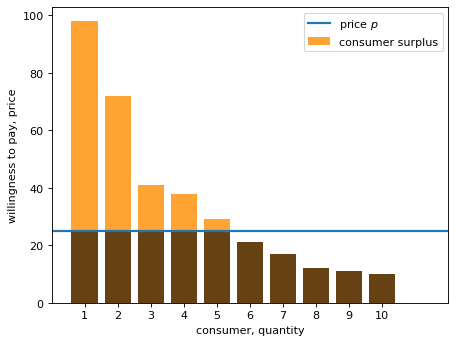

In [21]:
fig, ax = plt.subplots(dpi=80)
consumers = range(1, 11) # consumers 1,..., 10
# willingness to pay for each consumer
wtp = (98, 72, 41, 38, 29, 21, 17, 12, 11, 10)
price = 25
ax.bar(consumers, wtp, label="consumer surplus", color="darkorange", alpha=0.8)
ax.plot((0, 12), (price, price), lw=2, label="price $p$")
ax.bar(consumers, [min(w, price) for w in wtp], color="black", alpha=0.6)
ax.set_xlim(0, 12)
ax.set_xticks(consumers)
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("consumer, quantity")
ax.legend()
plt.show()

The total consumer surplus in this market is

$$
\sum_{i=1}^{10} \max\{w_i - p, 0\}
= \sum_{w_i \geq p} (w_i - p)
$$

Since consumer surplus of consumer $ i $, $ \max\{w_i-p,0\} $, is a measure of her gains from trade (i.e., extent to which the good is valued over and above the amount the consumer had to pay), it is reasonable to consider total consumer surplus as a measurement of consumer welfare.

Later we will pursue this idea further, considering how different prices lead to different welfare outcomes for consumers and producers.

### A comment on quantity

Notice that in the figure, the horizontal axis is labeled “consumer, quantity”.

We have added “quantity” here because we can read the number of units sold from this axis, assuming for now that there are sellers who are willing to sell as many units as the consumers demand, given the current market price $ p $.

In this example, consumers 1 to 5 buy, and the quantity sold is 5.

Below we drop the assumption that sellers will provide any amount at a given price and study how this changes outcomes.

### A continuous approximation

It is often convenient to assume that there is a “very large number” of consumers, so that willingness to pay becomes a continuous curve.

As before, the vertical axis measures willingness to pay, while the horizontal axis measures quantity.

This kind of curve is called an **inverse demand curve**

An example is provided below, showing both an inverse demand curve and a given price.

The inverse demand curve is given by

$$
p = 100 e^{-q}
$$

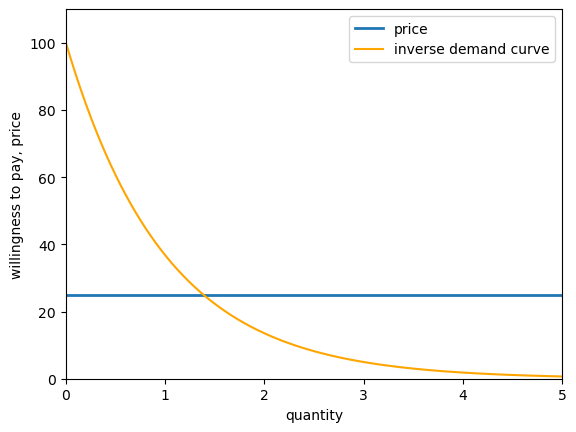

In [26]:
def inverse_demand(q):
    return 100 * np.exp(- q)

# build a grid to evaluate the function at different values of q
q_min, q_max = 0, 5
q_grid = np.linspace(q_min, q_max, 1000)

# plot the inverse demand curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.legend()
plt.show()

Reasoning by analogy with the discrete case, the area under the demand curve and above the price is called the **consumer surplus**, and is a measure of total gains from trade on the part of consumers.

The consumer surplus is shaded in the figure below.

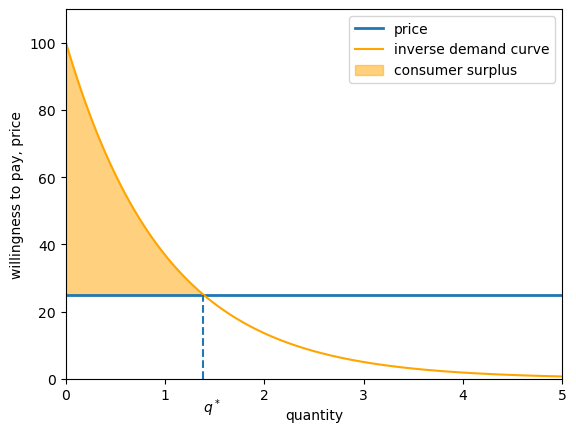

In [28]:
# solve for the value of q where demand meets price
q_star = np.log(100) - np.log(price)

fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_demand(q_grid), 
        color="orange", label="inverse demand curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, np.full(len(small_grid), price),
                inverse_demand(small_grid), color="orange",
                alpha=0.5, label="consumer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to pay, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 110)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()

The value $ q^* $ is where the inverse demand curve meets the price.

## Producer surplus

Having discussed demand, let’s now switch over to the supply side of the market.

### The discrete case

The figure below shows the price at which a collection of producers, also numbered 1 to 10, are willing to sell one unit of the good in question

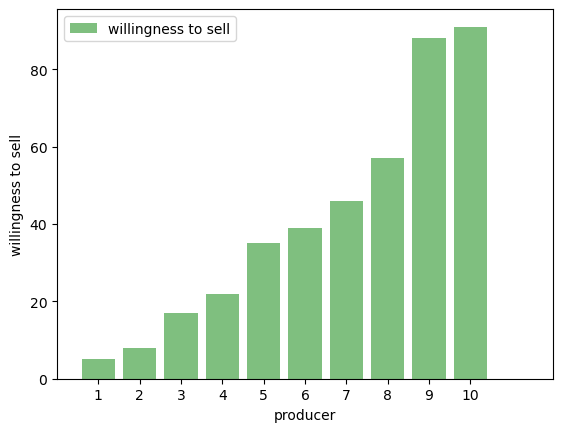

In [33]:
fig, ax = plt.subplots()
producers = range(1, 11) # producers 1,..., 10
# willingness to sell for each producer
wts = (5, 8, 17, 22, 35, 39, 46, 57, 88, 91)
price = 25
ax.bar(producers, wts, label="willingness to sell", color="green", alpha=0.5)
ax.set_xlim(0, 12)
ax.set_xticks(producers)
ax.set_ylabel("willingness to sell")
ax.set_xlabel("producer")
ax.legend()
plt.show()

Let $ v_i $ be the price at which producer $ i $ is willing to sell the good.

When the price is $ p $, producer surplus for producer $ i $ is $ \max\{p - v_i, 0\} $.

For example, a producer willing to sell at $\$10$ and selling at price $\$20$ makes a surplus of $\$10$.

Total producer surplus is given by

$$
\sum_{i=1}^{10} \max\{p - v_i, 0\}
= \sum_{p \geq v_i} (p - v_i)
$$

As for the consumer case, it can be helpful for analysis if we approximate producer willingness to sell into a continuous curve.

This curve is called the **inverse supply curve**

We show an example below where the inverse supply curve is

$$
p = 2 q^2
$$

The shaded area is the total producer surplus in this continuous model.

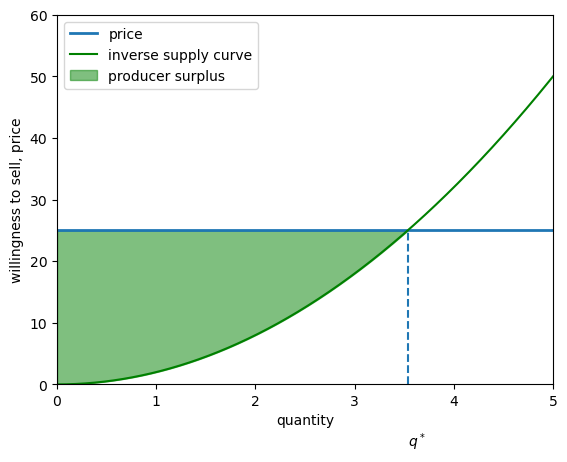

In [37]:
def inverse_supply(q):
    return 2 * q**2

# solve for the value of q where supply meets price
q_star = (price / 2)**(1/2)

# plot the inverse supply curve
fig, ax = plt.subplots()
ax.plot((q_min, q_max), (price, price), lw=2, label="price")
ax.plot(q_grid, inverse_supply(q_grid), 
        color="green", label="inverse supply curve")
small_grid = np.linspace(0, q_star, 500)
ax.fill_between(small_grid, inverse_supply(small_grid), 
                np.full(len(small_grid), price), 
                color="green",
                alpha=0.5, label="producer surplus")
ax.vlines(q_star, 0, price, ls="--")
ax.set_ylabel("willingness to sell, price")
ax.set_xlabel("quantity")
ax.set_xlim(q_min, q_max)
ax.set_ylim(0, 60)
ax.text(q_star, -10, "$q^*$")
ax.legend()
plt.show()


<a id='integration'></a>

## Integration

How can we calculate the consumer and producer surplus in the continuous case?

The short answer is: by using [integration](https://en.wikipedia.org/wiki/Integral).

In general, for a function $ f $, the **integral** of $ f $ over the interval $ [a, b] $ is the area under the curve $ f $ between $ a $ and $ b $.

This value is written as $ \int_a^b f(x) \mathrm{d} x $ and illustrated in the figure below when $ f(x) = \cos(x/2) + 1 $.

<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
C:\Users\saman\AppData\Local\Temp\ipykernel_55688\4010618522.py:12: SyntaxWarning: invalid escape sequence '\i'
  label="$\int_1^3 f(x) dx$")


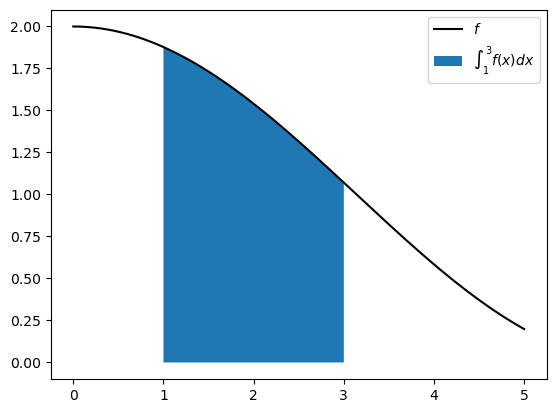

In [41]:
def f(x):
    return np.cos(x/2) + 1

xmin, xmax = 0, 5
a, b = 1, 3
x_grid = np.linspace(xmin, xmax, 1000)
ab_grid = np.linspace(a, b, 400)

fig, ax = plt.subplots()
ax.plot(x_grid, f(x_grid), label="$f$", color="k")
ax.fill_between(ab_grid, [0] * len(ab_grid), f(ab_grid), 
                label="$\int_1^3 f(x) dx$")
ax.legend()
plt.show()

There are many rules for calculating integrals, with different rules applying to different choices of $ f $.

Many of these rules relate to the [fundamental theorem of calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus).

We will not try to cover these ideas here, partly because the subject is too big, and partly because you only need to know one rule for this lecture, stated below.

If $ f(x) = c + \mathrm{d} x $, then

$$
\int_a^b f(x) \mathrm{d} x = c (b - a) + \frac{d}{2}(b^2 - a^2)
$$

In fact this rule can be calculated from elementary geometry – you might like to try by graphing $ f $ and calculating the area under the curve between $ a $ and $ b $.

We use this rule repeatedly in what follows.

## Supply and demand

Let’s now put supply and demand together.

This leads us to the market equilibrium, and from there onto a discussion of equilibria and welfare.

For most of this discussion, we’ll assume that inverse demand and supply curves are **affine** functions of quantity.

“Affine” means “linear plus a constant”.

We do this in order to simplify the exposition and enable us to use just a few tools from linear algebra, namely, matrix multiplication and matrix inversion.

We study a market for a single good in which buyers and sellers exchange a quantity $ q $ for a price $ p $.

Quantity $ q $ and price $ p $ are  both scalars.

We assume that inverse demand and supply curves for the good are:

$$
p = d_0 - d_1 q, \quad d_0, d_1 > 0
$$

$$
p = s_0 + s_1 q , \quad s_0, s_1 > 0
$$

We call them inverse demand and supply curves because price is on the left side of the equation rather than on the right side as it would be in a direct demand or supply function.

We can use a namedtuple to store the parameters for our single good market.

In [45]:
Market = namedtuple('Market', ['d_0', # demand intercept
                               'd_1', # demand slope
                               's_0', # supply intercept
                               's_1'] # supply slope
                   )

The function below creates an instance of a Market namedtuple with default values.

In [48]:
def create_market(d_0=1.0, d_1=0.6, s_0=0.1, s_1=0.4):
    return Market(d_0=d_0, d_1=d_1, s_0=s_0, s_1=s_1)

This `market` can then be used by our `inverse_demand` and `inverse_supply` functions.

In [51]:
def inverse_demand(q, model):
    return model.d_0 - model.d_1 * q

def inverse_supply(q, model):
    return model.s_0 + model.s_1 * q

Here is a plot of these two functions using `market`.

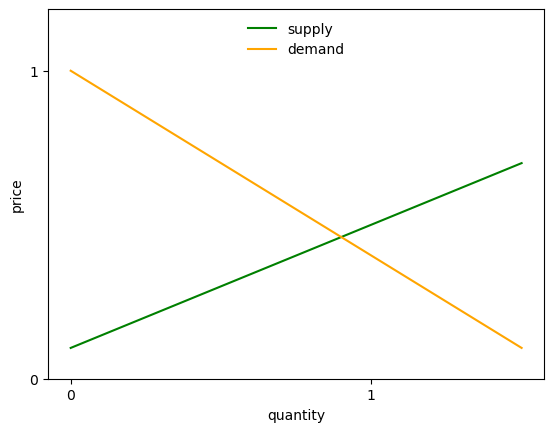

In [54]:
market = create_market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = inverse_supply(q_grid, market)
demand_curve = inverse_demand(q_grid, market)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply', color='green')
ax.plot(q_grid, demand_curve, label='demand', color='orange')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

In the above graph, an **equilibrium** price-quantity pair occurs at the intersection of the supply and demand curves.

### Consumer surplus

Let a quantity $ q $ be given and let $ p := d_0 - d_1 q $ be the
corresponding price on the inverse demand curve.

We define **consumer surplus** $ S_c(q) $ as the area under an inverse demand
curve minus $ p q $:


<a id='equation-eq-cstm-spls'></a>
$$
S_c(q) := 
\int_0^{q} (d_0 - d_1 x) \mathrm{d} x - p q \tag{1}
$$

The next figure illustrates this

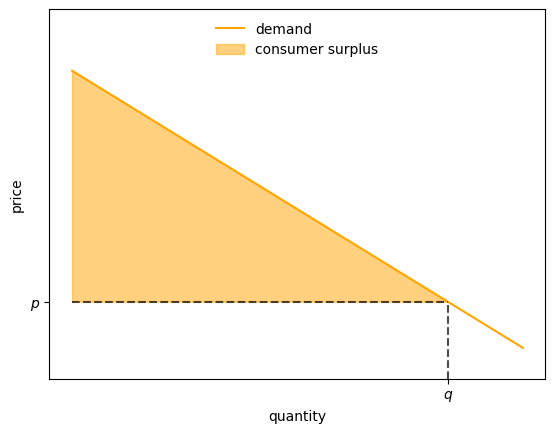

In [58]:
q = 1.25
p = inverse_demand(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, demand_curve, label='demand', color='orange')
ax.fill_between(q_grid[q_grid <= q],
                demand_curve[q_grid <= q],
                ps[q_grid <= q],
                label='consumer surplus',
                color="orange", 
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

Consumer surplus provides a measure of total consumer welfare at quantity $ q $.

The idea is that the inverse demand curve $ d_0 - d_1 q $ shows a consumer’s willingness to
pay for an additional increment of the good at a given quantity $ q $.

The difference between willingness to pay and the actual price is consumer surplus.

The value $ S_c(q) $ is the “sum” (i.e., integral) of these surpluses when the total
quantity purchased is $ q $ and the purchase price is $ p $.

Evaluating the integral in the definition of consumer surplus [(1)](#equation-eq-cstm-spls) gives

$$
S_c(q) 
= d_0 q - \frac{1}{2} d_1 q^2 - p q
$$

### Producer surplus

Let a quantity $ q $ be given and let $ p := s_0 + s_1 q $ be the
corresponding price on the inverse supply curve.

We define **producer surplus** as $ p q $ minus the area under an inverse supply curve


<a id='equation-eq-pdcr-spls'></a>
$$
S_p(q) 
:= p q - \int_0^q (s_0 + s_1 x) \mathrm{d} x \tag{2}
$$

The next figure illustrates this:

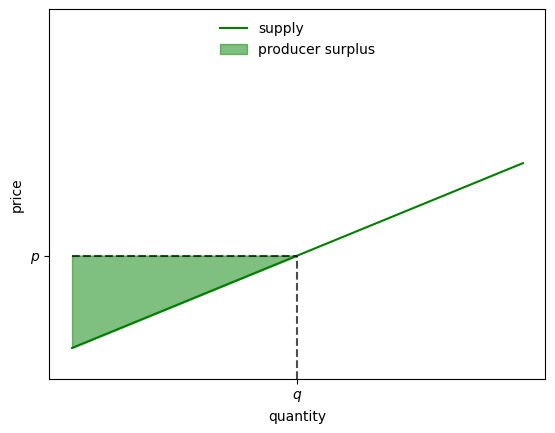

In [13]:
q = 0.75
p = inverse_supply(q, market)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply', color='green')
ax.fill_between(q_grid[q_grid <= q],
                supply_curve[q_grid <= q],
                ps[q_grid <= q],
                label='producer surplus',
                color="green",
                alpha=0.5)
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

Producer surplus measures total producer welfare at quantity $ q $

The idea is similar to that of consumer surplus.

The inverse supply curve $ s_0 + s_1 q $ shows the price at which producers are
prepared to sell, given quantity $ q $.

The difference between willingness to sell and the actual price is producer surplus.

The value $ S_p(q) $ is the integral of these surpluses.

Evaluating the integral in the definition of producer surplus [(2)](#equation-eq-pdcr-spls) gives

$$
S_p(q) = pq - s_0 q -  \frac{1}{2} s_1 q^2
$$

### Social welfare

Sometimes economists measure social welfare by a **welfare criterion** that
equals consumer surplus plus producer surplus, assuming that consumers and
producers pay the same price:

$$
W(q)
= \int_0^q (d_0 - d_1 x) dx - \int_0^q (s_0 + s_1 x) \mathrm{d} x
$$

Evaluating the integrals gives

$$
W(q) = (d_0 - s_0) q -  \frac{1}{2} (d_1 + s_1) q^2
$$

Here is a Python function that evaluates this social welfare at a given
quantity $ q $ and a fixed set of parameters.

In [60]:
def W(q, market):
    # Compute and return welfare
    return (market.d_0 - market.s_0) * q - 0.5 * (market.d_1 + market.s_1) * q**2

The next figure plots welfare as a function of $ q $.

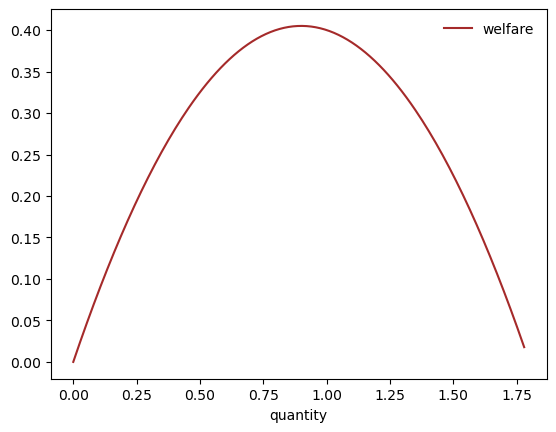

In [63]:
q_vals = np.linspace(0, 1.78, 200)
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare', color='brown')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

Let’s now give a social planner the task of maximizing social welfare.

To compute a quantity that  maximizes the welfare criterion, we differentiate
$ W $ with respect to $ q $ and then set the derivative to zero.

$$
\frac{\mathrm{d} W(q)}{\mathrm{d} q} = d_0 - s_0 - (d_1 + s_1) q  = 0
$$

Solving for $ q $ yields


<a id='equation-eq-old1'></a>
$$
q = \frac{ d_0 - s_0}{s_1 + d_1} \tag{3}
$$

Let’s remember the quantity $ q $ given by equation [(3)](#equation-eq-old1) that a social planner would choose to maximize consumer surplus plus producer surplus.

We’ll compare it to the quantity that emerges in a competitive equilibrium that equates supply to demand.

### Competitive equilibrium

Instead of equating quantities supplied and demanded, we can accomplish the
same thing by equating demand price to supply price:

$$
p =  d_0 - d_1 q = s_0 + s_1 q
$$

If we solve the equation defined by the second equality in the above line for
$ q $, we obtain


<a id='equation-eq-equilib-q'></a>
$$
q = \frac{ d_0 - s_0}{s_1 + d_1} \tag{4}
$$

This is the competitive equilibrium quantity.

Observe that the equilibrium quantity equals the same $ q $ given by equation  [(3)](#equation-eq-old1).

The outcome that the quantity determined by equation [(3)](#equation-eq-old1) equates
supply to demand brings us a **key finding:**

- a competitive equilibrium quantity maximizes our welfare criterion  


This is a version of the so-called [first fundamental welfare theorem](https://en.wikipedia.org/wiki/Fundamental_theorems_of_welfare_economics).

It also brings a useful **competitive equilibrium computation strategy:**

- after solving the welfare problem for an optimal quantity, we can read a competitive equilibrium price from either supply price or demand price at the competitive equilibrium quantity  